In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from plotnine import *
from numpy.linalg import *
pd.set_option('display.max_rows', 101)


import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

pd.set_option('display.width',None)

**18.**

In [2]:
def fit_linear_regression(X, y):
    """
    fit linear regression model and get the coefficients 
    :param X: numpy array with p rows and n columns (p x n matrix)
    :param y: numpy array with n rows
    :return: w -  numpy array of the coefficients vector
             D - numpy array of the singular values of X.
    """
    w = pinv(X.T) @ y
    D = svd(X,compute_uv=False)
        
    return (w, D)



In [3]:
def predict(X, w):
    """
    predict linear regression fitted values
    :param X: numpy array with p rows and n columns (p x n matrix)
    :param w: numpy array with p columns
    :return: y_hat - a numpy array with the predicted value by the model
    """
    y_hat = X.T @ w
    return y_hat
    

In [4]:
#read_data
covid19 = pd.read_csv("covid19_israel.csv")

**19. Create a new column in the DataFrame named "log detected" which holds the log of the
"detected" column.** 

In [5]:
#create log detected
covid19['log_detected'] = np.log(covid19.detected)

In [6]:
def preprocces(col):
    """
    this function add one columns to data matrix
    :param col: data column
    :return: X -  preproccesed X matrix ready to regression model
    """
    n = len(col)
    ones = np.ones(n)
    X = np.vstack((ones,col))
    return X

**20. Use the function fit linear regression function from before to fit the "log detected" cases
to "day num".**

In [7]:
#set y values vector 
y_log = covid19.log_detected
#preprocces and set X matrix
X = preprocces(covid19.day_num)
#fit linear model for log(y) = a + bx
w_log, D_log = fit_linear_regression(X,y_log)
#add prediction results to dataframe
covid19['log_detected_reg'] = predict(X, w_log)


**21. Plot two graphs: the first is the "log detected" as a function of "day num", and the second
is "detected" as a function of "day num". On each graph, add the data as single points,
and add the fitted curve that you've estimated.**

Since $log(y) = a + bx$ then we can say that $y = a'e^{bx}\$, and compute the regression model for detected coronavirus cases.

In [8]:
#predict exponential model by formula
covid19['exp_reg'] =  np.exp(covid19.log_detected_reg)
#melt data for easier plotting using ggplot
covid19_m = covid19.melt(id_vars=['day_num','date'])

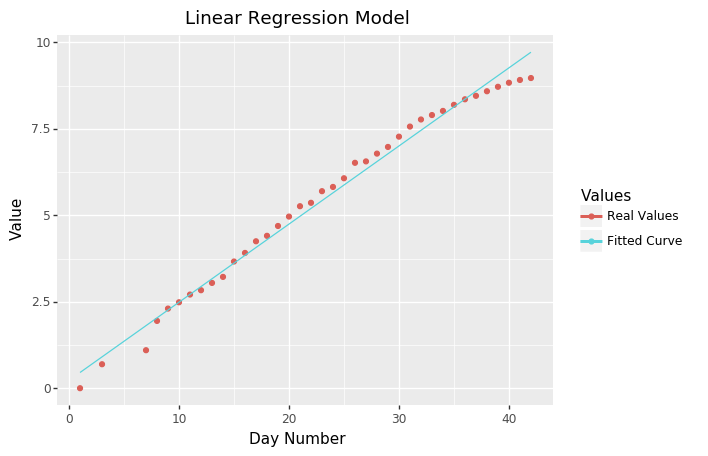

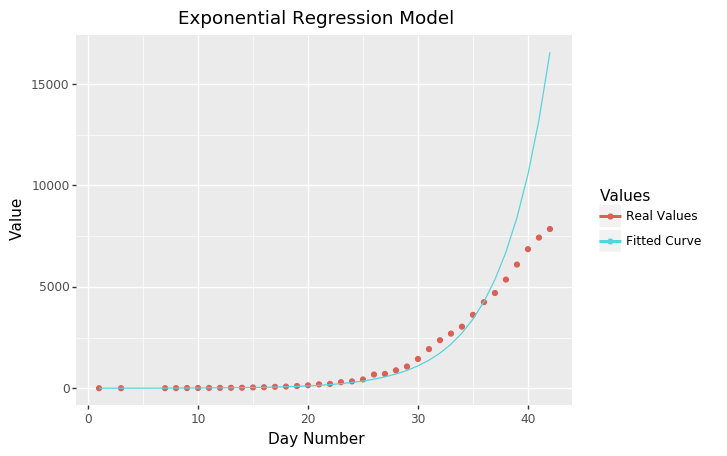

In [9]:
#create graph 1
g1 = ggplot(covid19_m, aes(x='day_num',y='value',color='variable')) +\
    geom_point(data = covid19_m[covid19_m['variable'].isin(['log_detected'])]) +\
    geom_line(data = covid19_m[covid19_m['variable'].isin(['log_detected_reg'])]) +\
    labs(title=r"Linear Regression Model",x='Day Number', y='Value') +\
    scale_color_discrete(name = "Values", labels = ["Real Values","Fitted Curve"])

#create graph 2
g2 = ggplot(covid19_m, aes(x='day_num',y='value',color='variable')) +\
    geom_point(data = covid19_m[covid19_m['variable'].isin(['detected'])]) +\
    geom_line(data = covid19_m[covid19_m['variable'].isin(['exp_reg'])]) +\
    labs(title=r"Exponential Regression Model",x='Day Number', y='Value')+\
    scale_color_discrete(name = "Values", labels = ["Real Values","Fitted Curve"])

g1.draw(),g2.draw();

**22.**
As said above, Since $log(y) = a + bx$ then we can say that $y = a'e^{bx}$, and compute the regression model for detected coronavirus cases.
Therefor, 
$L_{exp} (f_{w}(x,y)) = (e^{<w,x>}-y)^2 = (a'e^{bx}-y)^2$